<a href="https://colab.research.google.com/github/wandieinnocents/SpamSmsDetector_MachineLearning/blob/main/SmsSpamClassifyerFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**The SMS Spam Collection**

---

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,572 messages, tagged according being ham (legitimate or not spam) or spam.


**TOOL USED IN DEVELOPING THE MACHINE LEARNING MODEL**


---
We used , https://colab.research.google.com/ ,  Google Colaboratory is a free online cloud-based Jupyter notebook environment that allows us to train our machine learning  models .

**OUR DATASET**


---
Our dataset was got from kaggle , and we created a github repository where we uploaded it for flexible implementation of the model 
Link Github Repository : https://github.com/wandieinnocents/SpamSmsDetector_MachineLearning/blob/main/SmsSpamClassifyerFinal.ipynb

Link to the Data in the Repository : https://github.com/wandieinnocents/SpamSmsDetector_MachineLearning/blob/main/spam.csv









In [148]:
# import libraries for reading data, exploring and plotting
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm 

### Import the dataset from the file
Here we import our dataset to be used in the model prediction

In [149]:
# Read the data frame 
# we got from kaggle , and created a flexible repository on github for easy access
dataFrame = pd.read_csv('https://raw.githubusercontent.com/wandieinnocents/SpamSmsDetector_MachineLearning/main/spam.csv',encoding='latin-1')

### Print the dataset
Display the dataset that we are going to use in our model.

In [150]:
# Print the dataset
dataFrame.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


### Drop columns that  will will not be useful in predicting the model 
In this section we drop the columns that will not be used to train and test the model

In [151]:
#Drop columns that  will will not be useful in predicting the model
df = dataFrame.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis = 1)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### Rename Labels so they can be easily interpreted
Here we rename the columns so that they are in easily understood Labels

In [152]:
# Rename Columns so they can be easily interpreted
df = df.rename(columns={'v1': 'Class_Label', 'v2': 'Sms'})
df.head(10)

,Class_Label,Sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


### Display the Column names
Here we Display the new column names

In [153]:
# Displaying column names
df.columns

Index(['Class_Label', 'Sms'], dtype='object')

### Shape of the dataset (Rows and Columns)
This is the shape of the dataset

In [154]:
# Shape of the data (Rows and Columns)
df.shape

(5572, 2)

### Describe the data
There are 4516 ham compared to 653 spam messages. Which indicates that our data is imbalanced. The  popular ham message is “Go until jurong point, crazy.. Available only ”, whereas the most popular spam message is “Please call our customer service representativ.” which occurred 30 and 4 times, respectively.

In [155]:
# Description of the dataframe
df.groupby('Class_Label').describe().T

Class_Label                     ham  \
Sms count                      4825   
    unique                     4516   
    top      Sorry, I'll call later   
    freq                         30   

Class_Label                                               spam  
Sms count                                                  747  
    unique                                                 653  
    top      Please call our customer service representativ...  
    freq                                                     4


### Check for duplicate Rows and remove them from the data
Datasets that contain duplicates may contaminate training data with the test data or vice versa, entries with missing values will lead models to misunderstand features and outliers will undermine the training process – leading your model to “learn” patterns that do not exist in reality.



### Check for  duplicates in the data
In this section we are checking for  duplicates in  our data

In [156]:
# Check Duplicate data in the dataset
count_duplicates = df.duplicated(subset='Sms', keep='first').sum()

In [157]:
# Print Number of Duplicates
print("Duplicates  are : " + str(count_duplicates))

Duplicates  are : 403


## Remove the duplicates from the data
In this section we are removing duplicates from our model

In [158]:
# Remove duplicates from the data
df.drop_duplicates(inplace=True)

In [159]:
# Confirm Duplicate data if it was removed the dataset
count_duplicates_second_check = df.duplicated(subset='Sms', keep='first').sum()

In [160]:
# Print Number of Duplicates to make sure they were removed
print(" Duplicates  are now : " + str(count_duplicates_second_check))

 Duplicates  are now : 0


### New Shape of the dataset  without duplicates (New roles and columns)
This is our New  shape of the dataset after removing duplicates

In [161]:
# Show the new shape of the dataset( Rows and columns ) , after removing duplicate rows
df.shape

(5169, 2)

### Explore the dataset 
Display the number of Ham  messages , and Spam messages in our dataset.

In [162]:
# Explore the dataset
df['Class_Label'].value_counts()

ham     4516
spam     653
Name: Class_Label, dtype: int64

### Bar graph showing Ham and Spam messages
Display a bar graph visulizing the ham and spam messages in our dataset.

Text(0.5, 1.0, 'Number of ham and spam messages')

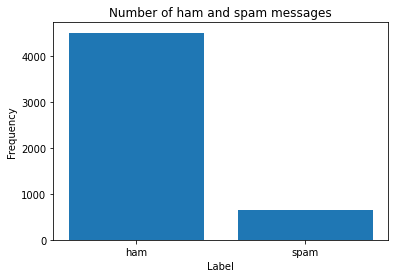

In [163]:
bar = df['Class_Label'].value_counts()
plt.bar(bar.index, bar)
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Number of ham and spam messages')

From the bar graph , we can see that we have an imbalanced dataset , since the number of ham and spam messages are not closely equal to one another.

### Let us Explore our words dataset : Word Clouds 


---


Generate the frequently occurring words in my spam messages.

Let us first filter the spam and Ham messages in our dataset

In [164]:
# Get all the ham and spam emails
ham_msg = df[df.Class_Label =='ham']
spam_msg = df[df.Class_Label=='spam']

In [165]:
# Print the Ham messages
ham_msg

,Class_Label,Sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...
...,...,...
5565,ham,Huh y lei...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [166]:
# Display the spam messages
spam_msg

,Class_Label,Sms
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [167]:
# Create numpy list to visualize using wordcloud
ham_msg_text = " ".join(ham_msg.Sms.to_numpy().tolist())
spam_msg_text = " ".join(spam_msg.Sms.to_numpy().tolist())

To visualize using WordCloud(), we extract words most commonly found in ham and spam messages, remove meaningless stop words such as “the”, “a” , “is” etc, and plot it. The WordCloud visualizes the most frequent words in the given text.

Word cloud of Ham messages , that shows the most common words in the ham dataset

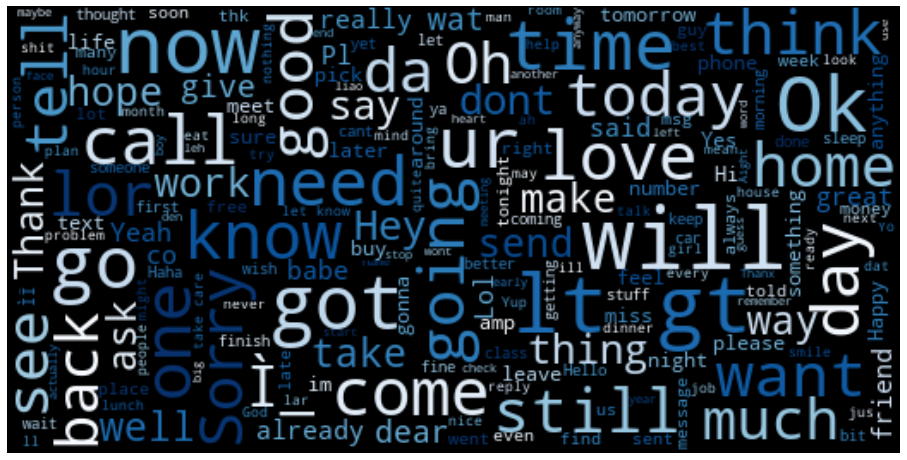

In [168]:
# wordcloud of ham messages
ham_msg_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Blues').generate(ham_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(ham_msg_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

The ham message WordCloud below shows that “will”, “Come”, will, Love and “Sorry” are the most commonly appeared word in ham messages.

Word cloud of Ham messages , that shows the most common words in the ham dataset

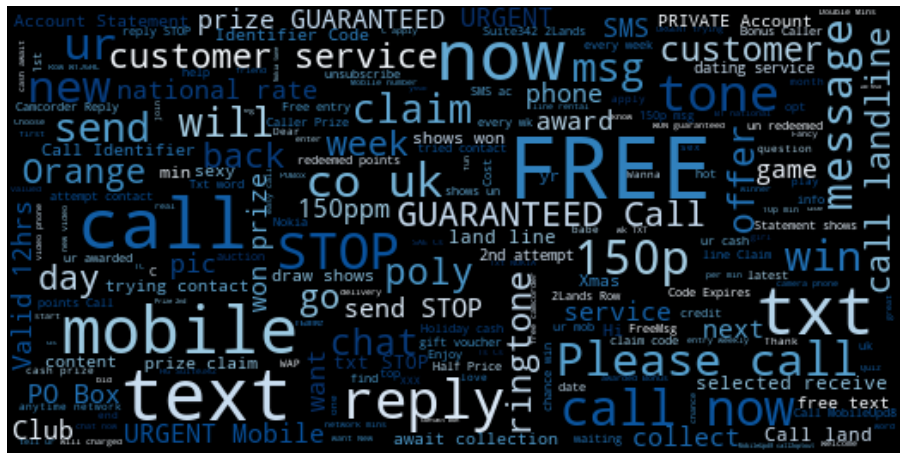

In [169]:
# wordcloud of spam messages
spam_msg_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Blues').generate(spam_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(spam_msg_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

From the visualization , The spam message WordCloud below shows that “Free”, “call”, “text”, “claim” and“reply” are most commonly appeared words in spam messages.

**CONVERT SPAM AND HAM TO NUMERIC FORMAT**


---



Lets now convert , the spam messages and the ham  messages to numeric format so that it can easily be used in the model , and machine readable format.

In [170]:
# Convert ham to 0 , and spam to 1
df = df.replace(['ham','spam'],[0, 1])
df.head(10)

,Class_Label,Sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


**REMOVE STOP WORDS AND PUNCTUATIONS FROM THE DATASET**

* Stop words are the words which are generally filtered out before processing a natural language are called stop words. These are actually the most common words in any language (like articles, prepositions, pronouns, conjunctions, etc) and does not add much information to the text.

*   We remove them using NLTK Library, (Natural Language Toolkit)






In [171]:
# import naturlal language toolkit
import nltk
nltk.download('stopwords')

#remove stop words and punctuations
import string
def process_sms(Sms):

    Sms = Sms.translate(str.maketrans('', '', string.punctuation))
    Sms = [word for word in Sms.split() if word.lower() not in stopwords.words('english')]

    return " ".join(Sms)

df['Sms'] = df['Sms'].apply(process_sms)
# print out the dataframe with stop words and punctuations removed
df.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Class_Label,Sms
0,0,Go jurong point crazy Available bugis n great ...
1,0,Ok lar Joking wif u oni
2,1,Free entry 2 wkly comp win FA Cup final tkts 2...
3,0,U dun say early hor U c already say
4,0,Nah dont think goes usf lives around though
5,1,FreeMsg Hey darling 3 weeks word back Id like ...
6,0,Even brother like speak treat like aids patent
7,0,per request Melle Melle Oru Minnaminunginte Nu...
8,1,WINNER valued network customer selected receiv...
9,1,mobile 11 months U R entitled Update latest co...


Dataframe for our Class labels and the sms

In [172]:
# new dataframe for our class label and sms
Sms = pd.DataFrame(df['Sms'])
Class_Label = pd.DataFrame(df['Class_Label'])

In [173]:
# Sms  without stop words
Sms

,Sms
0,Go jurong point crazy Available bugis n great ...
1,Ok lar Joking wif u oni
2,Free entry 2 wkly comp win FA Cup final tkts 2...
3,U dun say early hor U c already say
4,Nah dont think goes usf lives around though
...,...
5567,2nd time tried 2 contact u U å£750 Pound prize...
5568,Ì b going esplanade fr home
5569,Pity mood Soany suggestions
5570,guy bitching acted like id interested buying s...


In [174]:
# Class Labels
Class_Label

,Class_Label
0,0
1,0
2,1
3,0
4,0
...,...
5567,1
5568,0
5569,0
5570,0


**Convert the Words to Vectors**


---



- We convert words to vectors inorder to get distinct featrues from the text for the model training , and we do so by converting the sms to numeric vectors.
- We convert the words using  TfidfVectorizer

In [175]:
# Convert words to vectors 
#convert the text data into vectors
from sklearn.feature_extraction.text import TfidfVectorizer

spam_classifyer_vectorizer = TfidfVectorizer()
spam_sms_vectors = spam_classifyer_vectorizer.fit_transform(df['Sms'])
spam_sms_vectors.shape

(5169, 9376)

Class labels and Model Features , our features were vectorized 


In [176]:
# Our features are the word vectors , denoted X in this case
spam_sm_features = spam_sms_vectors

**Split the dataset into train and test**

Train/Test is a method to measure the accuracy of our  model. It is called Train/Test because you split the the data set into two sets: a training set and a testing set. We train the model using the training set.

In [177]:
#split the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(spam_sm_features, df['Class_Label'], test_size=0.15, random_state=42)

**Machine Learning Classifyers Used ,**


---
 - spam classifier using naive bayes
 - spam classifier using decision tree

  We will make use of sklearn library, The sklearn library we used  contains a lot of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction ,naive bayes , random forest , decision trees.



   


In [178]:
#import sklearn packages for building classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [179]:
#initialize multiple classification models
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)


In [180]:
#create a dictionary of variables and models
clfs = {'NaiveBayes': mnb, 'Decision Tree': dtc}

In [181]:
#fit the data onto the models
def train(clf, spam_sms_vectors, targets):
    clf.fit(spam_sms_vectors, targets)

def predict(clf, spam_sms_vectors):
    return (clf.predict(spam_sms_vectors))

In [182]:
pred_scores_word_vectors = []
for k,v in clfs.items():
    train(v, X_train, y_train)
    pred = predict(v, X_test)
    pred_scores_word_vectors.append((k, [accuracy_score(y_test , pred)]))

**ACCURACY MEASURE FOR THE MODEL**


---



In [183]:
# Prediction scores
pred_scores_word_vectors
# print the prediction scores
print(pred_scores_word_vectors)

[('NaiveBayes', [0.9742268041237113]), ('Decision Tree', [0.9536082474226805])]


Thus, our spam filtering algorithm has an accuracy of 97% For naive bayes, which means that , for each 100 emails that the model  classified, 97 were correctly classified, and the decision tree accuracy   was  95% .

**ACCURACY MEASURES ON GRAPH TO CHOSE THE BEST ALGORITHM**

Text(0, 0.5, 'Accuracy')

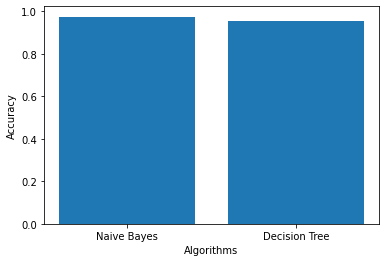

In [184]:
# Accuracy graph
accuracies=[0.9742268041237113,0.9536082474226805]
# Algorithms
models=['Naive Bayes','Decision Tree']

plt.bar(models,accuracies)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
#plt.show()

**MODEL PREDICTION**


---



We wrote a function to test if the model can predict a message to be ham or spam

In [185]:
#write a function to detect if the message is spam or not
def find(predict_sms_class):
    if predict_sms_class == 1:
        print ("Message is SPAM")
    else:
        print ("Message is NOT Spam")

In [186]:
# Enter custom message to test for the classification (Ham or Spam)
custom_sms_to_preduct = ["Please , your prize for , free 500GB internet bundles is in your account"]
vectorized_integers = spam_classifyer_vectorizer.transform(custom_sms_to_preduct)

In [187]:
# Predict the class of the captured custom sms
sms_predicted_class = mnb.predict(vectorized_integers)
find(sms_predicted_class)

Message is SPAM


**CONFUSION MATRIX**

Checking Classification Results with Confusion Matrix
The confusion matrix is a metric that is used to measure the performance of the algorithm . 

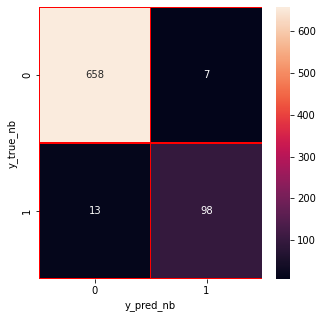

In [188]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Naive Bayes
y_pred_nb = mnb.predict(X_test)
y_true_nb = y_test
cm = confusion_matrix(y_true_nb, y_pred_nb)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
# x label for the naive bayes prediction
plt.xlabel("y_pred_nb")
# y label for the naive bayes prediction
plt.ylabel("y_true_nb")
# Plot
plt.show()

**CONFUSION MATRIX ANALYSIS**


---



Looking at the results of the confusionmatrix , we can affirm that naive bayes classifyer worked well.
  - For a model to be refered as a right model, the number of false positives , and the number of false negatives should be a limited number , minimal which is what this current model has been able to achieve.

  - Out of the 665 actual instances of 'ham' sms' , the model  predicted correctly 658 of these ham sms' (True Positives);

  - Out of the 111 actual instances of spam sms', it predicted correctly 98 of them.
  - Number of True Positives   : 658
  - Number of False Positives  : 7
  - Number of True Negatives   : 98
  - Number of False  Negatives : 13





**PRECISION, RECALL AND F1-SCORE**


---



- There are also other performance measures which we compute from the confusion matrix which are precision , recall and f1-score.

- To compute them , we use the function known as classification_report
- Precision refers to  the number of positive class predictions that actually belong to the positive class.
- Recall refers to the probability of correctly labeling members of the target class
- The F1-score combines the precision and recall of a classifier into a single metric by taking their harmonic mean. It is primarily used to compare the performance of two classifiers.


In [189]:
# Precision , recall and f1-score
from sklearn.metrics import classification_report
# Print the classification report
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       665
           1       0.93      0.88      0.91       111

    accuracy                           0.97       776
   macro avg       0.96      0.94      0.95       776
weighted avg       0.97      0.97      0.97       776



**ROC curve**

A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

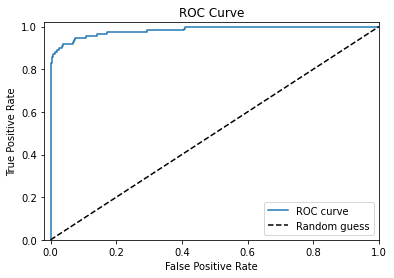

In [190]:
# Implement ROC Curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

y_pred_prob = nb.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

# save figure
plt.savefig('roc_curve.png', dpi=200)

**ROC SCORE**

In [191]:
# ROC SCORE
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_prob) 

0.9828354670459933

**PRECISION-RECALL CURVE**

The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

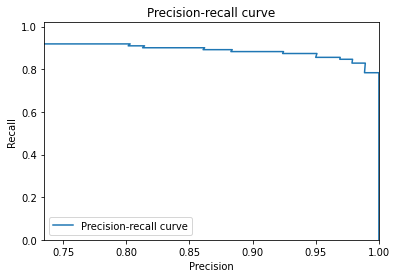

In [192]:
from sklearn.metrics import precision_recall_curve 

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# create the plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.xlim([0.735, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower left")

# save the figure
plt.savefig('precision_recall.png', dpi=200)

**AVERAGE PRECISION SCORE**


---



In this model context , the area is known as average precision and can be obtained by importing roc_auc_score from sklearn.metrics,

In [193]:
# average precision score
from sklearn.metrics import average_precision_score

average_precision_score(y_test, y_pred_prob) 

0.9520614552223565